In [4]:
 # Celda 1: Instalar librerías (si es necesario)
!pip install pandas numpy

# Celda 2: Importar librerías
import pandas as pd
import numpy as np

# Celda 3: Subir el archivo CSV
from google.colab import files
uploaded = files.upload()


Saving Ventas de Flores.csv to Ventas de Flores.csv


In [5]:
# Lee el archivo subido (solo una de estas líneas)
import io
df = pd.read_csv(io.BytesIO(uploaded['Ventas de Flores.csv']), sep=";", encoding='iso-8859-1')

print("✅ Archivo cargado exitosamente!")

# Celda 5: Análisis del archivo, cuantas filas y columnas
print(f"El archivo tiene {df.shape[0]} filas y {df.shape[1]} columnas")

✅ Archivo cargado exitosamente!
El archivo tiene 4976 filas y 13 columnas


In [6]:
 # Después de cargar el archivo, siempre haz esto:
print("?? INSPECCIÓN INICIAL:")
print(f"?? Dimensiones: {df.shape[0]} filas, {df.shape[1]} columnas")
print("\n?? Primeras 5 filas:")
print(df.head())
print("\n?? Información general:")
print(df.info())
print("\n? Valores faltantes:")
print(df.isnull().sum())

?? INSPECCIÓN INICIAL:
?? Dimensiones: 4976 filas, 13 columnas

?? Primeras 5 filas:
   OrderNumber    OrderDate  OrderType CustomerType            CustomerName  \
0      1000001  ene 1, 2020  Wholesale     Business   Tristan Henderson LLC   
1      1000002  ene 1, 2020     Retail   Individual         Emmanuel Garcia   
2      1000003  ene 1, 2020  Wholesale     Business  Christian Hughes Group   
3      1000004  ene 1, 2020     Retail   Individual       Geoffrey Gonzalez   
4      1000005  ene 1, 2020  Wholesale     Business    Eduardo Williams LLC   

   CustomerState ProductCategory ProductNumber             ProductName  \
0      Tennessee            Rose         RS105           Portland Rose   
1          Texas            Rose         RS101       Prickly Wild Rose   
2       New York           Daisy         DS808  Pale Purple Coneflower   
3  Massachusetts            Rose         RS502             Rosa Glauca   
4       New York           Daisy         DS813           English Daisy

In [7]:
# Análisis y Limpieza

# Convertir columnas numéricas que están como texto
def limpiar_valor_numerico(valor):
    if isinstance(valor, str):
        # Remover comas, puntos como separadores de miles y símbolos de dólar
        valor = valor.replace('$', '').replace('.', '').replace(',', '.')
        try:
            return float(valor)
        except:
            return np.nan
    return valor

# Aplicar la limpieza a las columnas numéricas
columnas_numericas = ['Quantity', 'Price', 'Discount', 'OrderTotal']
# Make sure to run the previous cells to load the dataframe 'df'
for col in columnas_numericas:
    df[col] = df[col].apply(limpiar_valor_numerico)

# Convertir OrderDate a datetime (manejando formato español)
df['OrderDate'] = pd.to_datetime(df['OrderDate'], format='%b %d, %Y', errors='coerce')

# Verificar resultados
print("?? Después de la limpieza:")
print(df.info())
print(f"\n?? Rango de fechas: {df['OrderDate'].min()} to {df['OrderDate'].max()}")

?? Después de la limpieza:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4976 entries, 0 to 4975
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   OrderNumber      4976 non-null   int64         
 1   OrderDate        3309 non-null   datetime64[ns]
 2   OrderType        4976 non-null   object        
 3   CustomerType     4976 non-null   object        
 4   CustomerName     4976 non-null   object        
 5   CustomerState    4976 non-null   object        
 6   ProductCategory  4976 non-null   object        
 7   ProductNumber    4976 non-null   object        
 8   ProductName      4976 non-null   object        
 9   Quantity         4976 non-null   float64       
 10  Price            4976 non-null   float64       
 11  Discount         4976 non-null   float64       
 12  OrderTotal       4976 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(7)
memory usage

In [8]:
# Análisis Exploratorio
# Estadísticas descriptivas
print("?? Estadísticas descriptivas:")
print(df[['Quantity', 'Price', 'Discount', 'OrderTotal']].describe())

# Análisis por categorías
print("\n?? Ventas por tipo de orden:")
print(df['OrderType'].value_counts())

print("\n?? Ventas por tipo de cliente:")
print(df['CustomerType'].value_counts())

print("\n?? Ventas por categoría de producto:")
print(df['ProductCategory'].value_counts())

print("\n?? Top 5 estados por ventas:")
print(df['CustomerState'].value_counts().head())

?? Estadísticas descriptivas:
          Quantity        Price     Discount    OrderTotal
count  4976.000000  4976.000000  4976.000000   4976.000000
mean     11.107516   126.849068    14.369566   1386.502020
std      20.367634   200.362183    32.763816   5107.252507
min       1.000000     4.990000     0.000000      4.990000
25%       1.000000    14.990000     0.000000     42.990000
50%       5.000000    31.470000     2.200000    179.035000
75%      10.000000   179.000000     8.600000    691.200000
max     109.000000   899.000000   179.800000  83708.400000

?? Ventas por tipo de orden:
OrderType
Wholesale    2833
Retail       2143
Name: count, dtype: int64

?? Ventas por tipo de cliente:
CustomerType
Business      2932
Individual    2044
Name: count, dtype: int64

?? Ventas por categoría de producto:
ProductCategory
Rose         2208
Orchid       1032
Daisy         992
Sunflower     744
Name: count, dtype: int64

?? Top 5 estados por ventas:
CustomerState
California    386
Florida       

In [9]:
# Análisis de Ventas
# Ventas totales
ventas_totales = df['OrderTotal'].sum()
print(f"?? Ventas totales: ${ventas_totales:,.2f}")

# Ventas promedio por orden
venta_promedio = df['OrderTotal'].mean()
print(f"?? Venta promedio por orden: ${venta_promedio:,.2f}")

# Ventas por mes
df['Month'] = df['OrderDate'].dt.to_period('M')
ventas_mensuales = df.groupby('Month')['OrderTotal'].sum()
print("\n?? Ventas mensuales:")
print(ventas_mensuales)

?? Ventas totales: $6,899,234.05
?? Venta promedio por orden: $1,386.50

?? Ventas mensuales:
Month
2020-02    879653.24
2020-03    630759.49
2020-05    565849.22
2020-06    424106.66
2020-07    462847.29
2020-09    484600.11
2020-10    467425.86
2020-11    545310.59
Freq: M, Name: OrderTotal, dtype: float64


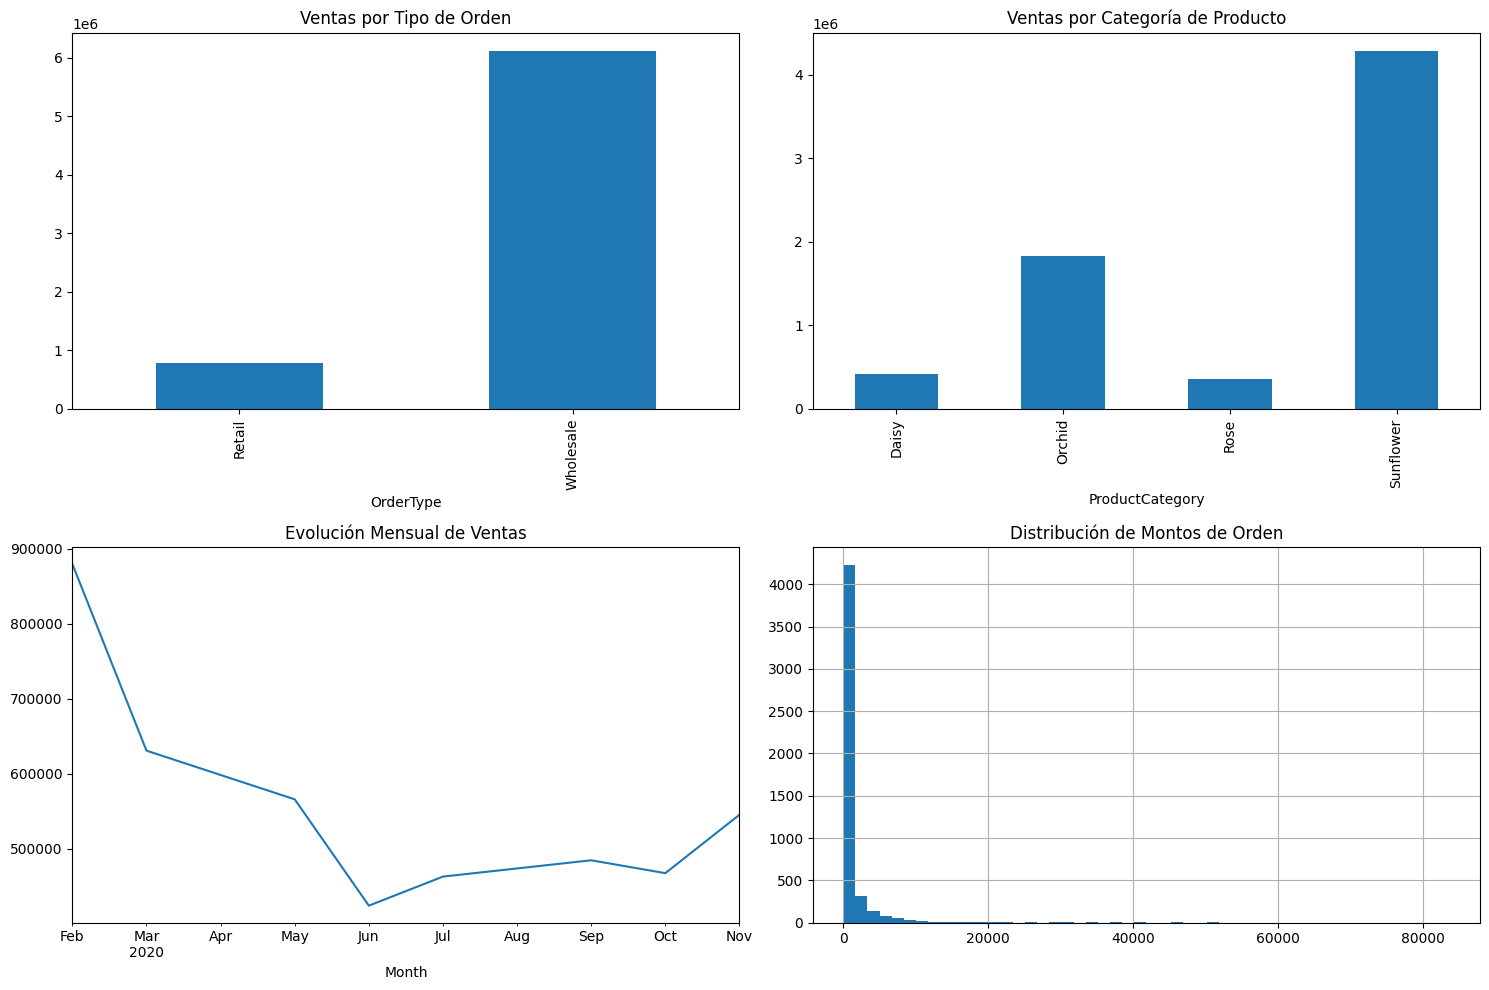

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualización
# Configurar estilo
plt.style.use('default')
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Ventas por tipo de orden
df.groupby('OrderType')['OrderTotal'].sum().plot(kind='bar', ax=axes[0,0], title='Ventas por Tipo de Orden')

# Ventas por categoría de producto
df.groupby('ProductCategory')['OrderTotal'].sum().plot(kind='bar', ax=axes[0,1], title='Ventas por Categoría de Producto')

# Evolución mensual de ventas
ventas_mensuales.plot(ax=axes[1,0], title='Evolución Mensual de Ventas')


# Distribución de montos de orden
df['OrderTotal'].hist(bins=50, ax=axes[1,1])
axes[1,1].set_title('Distribución de Montos de Orden')

# Distribución de montos de orden
#df['OrderTotal'].hist(bins=50, ax=axes[1,1], title='Distribución de Montos de Orden')

plt.tight_layout()
plt.show()

In [11]:
# Análisis de Clientes
# Top 10 clientes por volumen de compra
top_clientes = df.groupby('CustomerName')['OrderTotal'].sum().sort_values(ascending=False).head(10)
print("?? Top 10 clientes por volumen de compra:")
print(top_clientes)

# Frecuencia de compra por cliente
frecuencia_compras = df['CustomerName'].value_counts()
print(f"\n?? Cliente más frecuente: {frecuencia_compras.idxmax()} ({frecuencia_compras.max()} compras)")

?? Top 10 clientes por volumen de compra:
CustomerName
Alexis Coleman LLC            155815.72
Cole Torres LLC               109909.25
Marcus Anderson Inc.          103297.29
Alvin Hu LLC                   92517.25
Morgan Gonzalez Inc.           89598.67
Jose Flores Group              88825.28
Ashley Martinez Industries     86930.45
Christine Nara Inc.            86635.64
William Lee International      84839.27
Cindy Patel LLC                78230.29
Name: OrderTotal, dtype: float64

?? Cliente más frecuente: Marcus Anderson Inc. (36 compras)


In [12]:
# Guardar dataframe limpio
df_clean = df.copy()
df_clean.to_csv('datos_limpios.csv', index=False)
print("?? Datos limpios guardados en 'datos_limpios.csv'")



?? Datos limpios guardados en 'datos_limpios.csv'


In [13]:
from google.colab import drive
drive.mount('/content/drive')

# Guardar en una carpeta de Drive
df.to_csv('/content/drive/MyDrive/Análisis de Datos/datos_limpios.csv', index=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
